# Analiza profitabilnosti custom slot mašine

### Evidencija podataka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'evidencija_vrtnji.csv'
df = pd.read_csv(file_path)

print(df.head())

     Kombinacija          Ishod  Spin_profit  Total_profit
0  src, lim, tre           fail          0.5           0.5
1  kes, jag, tre           fail          0.5           1.0
2  kes, tre, tre  Duple_vockice         -0.5           0.5
3  tre, tre, nar  Duple_vockice         -0.5           0.0
4  src, lim, gro           fail          0.5           0.5


### Ukupni profit nakon 100 000 vrtnji 

In [2]:
total_profit = df.loc[df.index[-1], "Total_profit"]
print("Ukupni profit:", str(total_profit), "€")

Ukupni profit: 2027.0 €


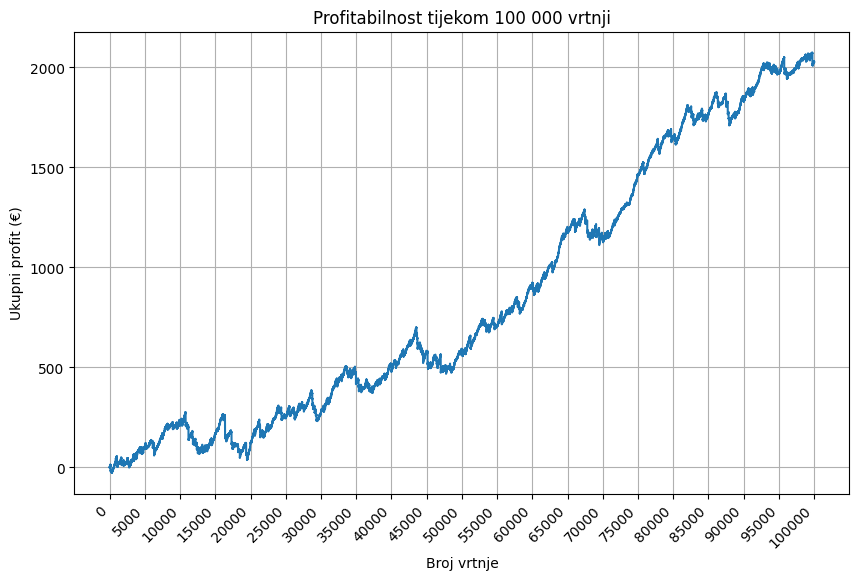

In [3]:
vrtnje =  [i for i in range(0,100000)]
custom_x_axis = [i for i in range(0,100001, 5000)]
plt.figure(figsize=(10, 6))
plt.plot(vrtnje, df['Total_profit'], linestyle='-')
plt.title('Profitabilnost tijekom 100 000 vrtnji')
plt.xlabel('Broj vrtnje')
plt.ylabel('Ukupni profit (€)')
plt.grid(True)
plt.xticks(custom_x_axis, rotation=45, ha='right')
plt.show()

### Analiza učestalosti ishoda

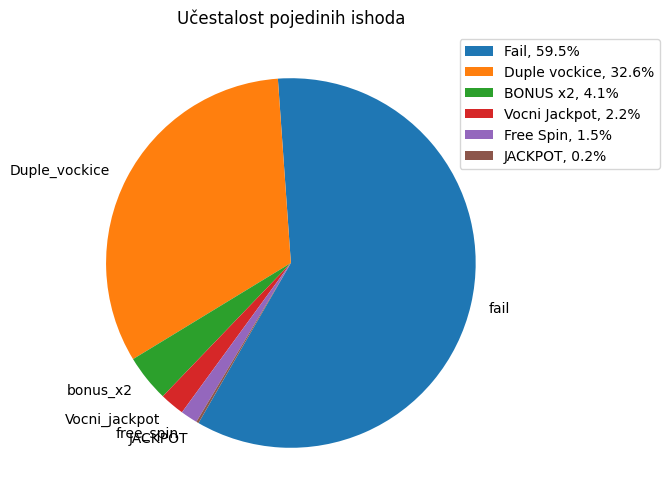

In [4]:
categories = df['Ishod']

label_counts = categories.value_counts()

percentages = (label_counts / len(categories)) * 100

# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(percentages, labels=percentages.index, startangle=240,
       labeldistance=1.1)
plt.title('Učestalost pojedinih ishoda')

labels = ["Fail", "Duple vockice", "BONUS x2", "Vocni Jackpot", "Free Spin", "JACKPOT"]
labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, percentages)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

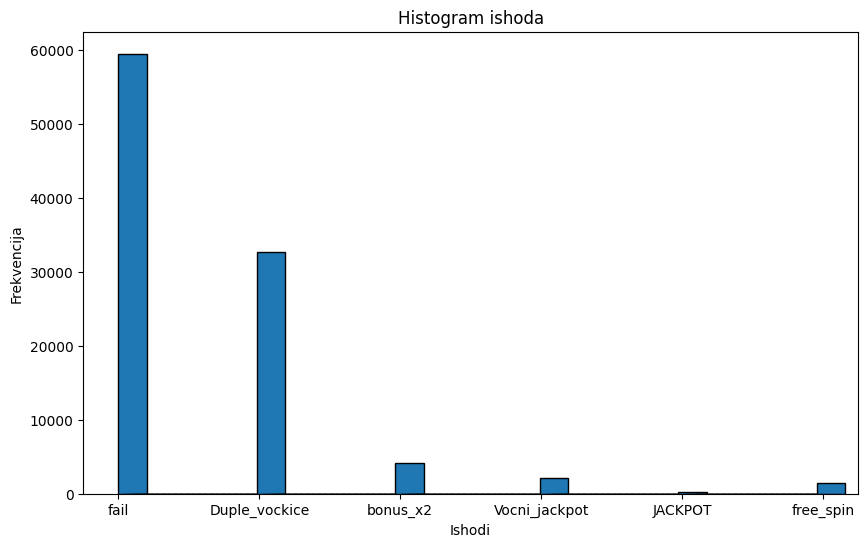

Ishod
fail             59455
Duple_vockice    32585
bonus_x2          4111
Vocni_jackpot     2152
free_spin         1490
JACKPOT            207
Name: count, dtype: int64


In [5]:
column_name = 'Ishod'
plt.figure(figsize=(10, 6))
plt.hist(df[column_name], bins='auto', edgecolor='black', width=0.2)
# Adding labels and title
plt.title(f'Histogram ishoda')
plt.xlabel("Ishodi")
plt.ylabel('Frekvencija')
plt.show()

print(label_counts)

### Analiza Vocnog Jackpota
Koje se voće najcesce pojavljuje u vocnom jackpotu?

2152


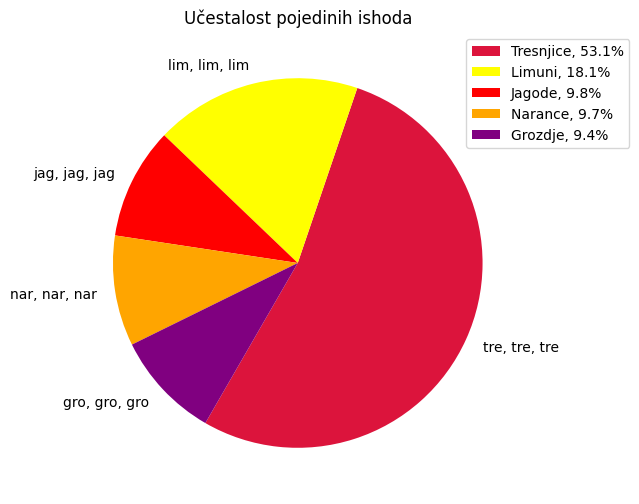

In [8]:
column_name = 'Ishod'
voc_jack = 'Vocni_jackpot'

# Selecting rows with the desired label in the specified column
selected_rows = df[df[column_name] == voc_jack]
df = selected_rows
# Display the selected rows
print(len(selected_rows))

categories = df['Kombinacija']

label_counts = categories.value_counts()

percentages = (label_counts / len(categories)) * 100

# Plotting the pie chart
plt.figure(figsize=(6,6))
custom_colors = ['crimson', 'yellow', 'red', 'orange', 'purple']
plt.pie(percentages, labels=percentages.index, startangle=240, colors=custom_colors,
       labeldistance=1.1)
plt.title('Učestalost pojedinih ishoda')

labels = ["Tresnjice", "Limuni", "Jagode", "Narance", "Grozdje"]
labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, percentages)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()